In [94]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [113]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
                                      batch_size=batch_size,
                                      color_mode = "rgb",
                                      directory=train_dir,
                                      target_size=(IMG_WIDTH,IMG_HEIGHT),
                                      class_mode = "binary")
val_data_gen = train_image_generator.flow_from_directory(
                                      batch_size=batch_size,
                                      color_mode = "rgb",
                                      directory=validation_dir,
                                      target_size=(IMG_WIDTH,IMG_HEIGHT),
                                      class_mode = "binary")
test_data_gen = train_image_generator.flow_from_directory(
                                      batch_size=1,
                                      color_mode = "rgb",
                                      directory=PATH,
                                      target_size=(IMG_WIDTH,IMG_HEIGHT),
                                      shuffle = False,
                                      class_mode = None,
                                      classes = ["test",]
                                      )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


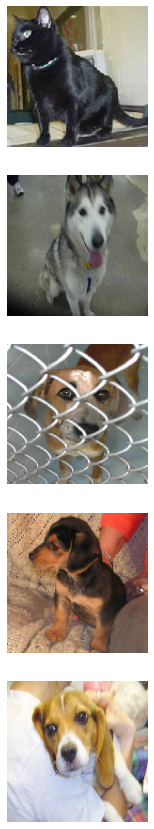

In [38]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [47]:
# 5
train_image_generator = ImageDataGenerator(4,6,rescale = 1./255)


Found 2000 images belonging to 2 classes.


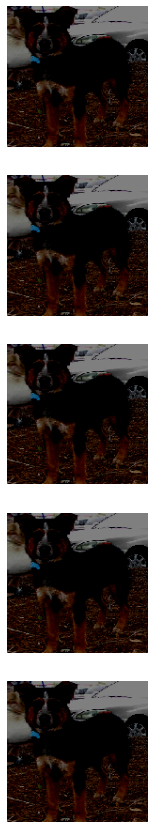

In [48]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)


In [106]:
# 7
model = Sequential()
model.add(Conv2D(32, 3,input_shape = (IMG_WIDTH,IMG_HEIGHT,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(
    optimizer = Adam(),
    loss = BinaryCrossentropy(),
    metrics = ["accuracy",]
)

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_155 (Conv2D)         (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_156 (Conv2D)         (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 18, 18, 64)     

In [128]:
# 8
epochs = 20
history = model.fit(
    x = train_data_gen,
    validation_data = val_data_gen,
    steps_per_epoch = len(train_data_gen),
    epochs = epochs,
    validation_steps = len(val_data_gen)

)

Epoch 1/20
16/16 [==============================] - 9s 590ms/step - loss: 0.7375 - accuracy: 0.6840 - val_loss: 0.5741 - val_accuracy: 0.6990
Epoch 2/20
16/16 [==============================] - 9s 565ms/step - loss: 0.4682 - accuracy: 0.7650 - val_loss: 0.5996 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 9s 565ms/step - loss: 0.3934 - accuracy: 0.8280 - val_loss: 0.5732 - val_accuracy: 0.7180
Epoch 4/20
16/16 [==============================] - 10s 629ms/step - loss: 0.3470 - accuracy: 0.8435 - val_loss: 0.5448 - val_accuracy: 0.7470
Epoch 5/20
16/16 [==============================] - 9s 566ms/step - loss: 0.2926 - accuracy: 0.8735 - val_loss: 0.5791 - val_accuracy: 0.7400
Epoch 6/20
16/16 [==============================] - 9s 565ms/step - loss: 0.2389 - accuracy: 0.9045 - val_loss: 0.5964 - val_accuracy: 0.7340
Epoch 7/20
16/16 [==============================] - 9s 565ms/step - loss: 0.1863 - accuracy: 0.9360 - val_loss: 0.6183 - val_accuracy: 0.7200
Epoch

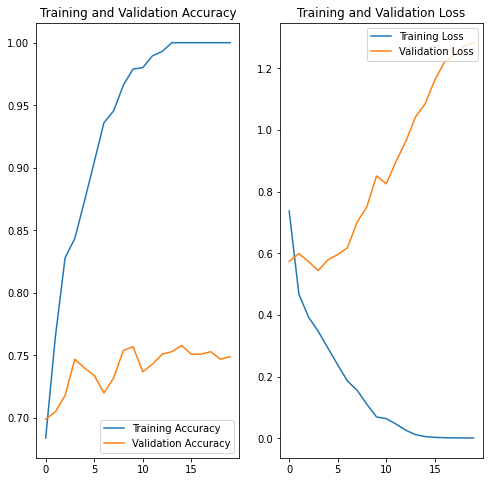

In [129]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [130]:
# 11
probabilities = model.predict_generator(test_data_gen).reshape(1,50)[0]
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
